In [1]:
print(__doc__)

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

Automatically created module for IPython interactive environment


In [70]:
np.random.seed(0)

batch_size = 45
centers = [[-1,1,0],
          [-1,-1,0],
          [1,1,0],
          [1,-1,0],
          [0,0,3],
          [-1,1,6],
          [-1,-1,6],
          [1,1,6],
          [1,-1,6]]
print(centers)
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std=0.4)

[[-1, 1, 0], [-1, -1, 0], [1, 1, 0], [1, -1, 0], [0, 0, 3], [-1, 1, 6], [-1, -1, 6], [1, 1, 6], [1, -1, 6]]


In [58]:
N=10000000
with open('data10m','wb') as f:
    for i in range(N):
        if i%1000000==0:
            print ('1/10')
        row = ','.join(['%.5f' % num for num in X[i]])
        if i==N-1:
            f.write(row)
        else:
            f.write(row+'\n')

1/10


IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [59]:
print(n_clusters,X[0])

(6, array([-0.30380194, -0.30818906,  2.09700696]))


In [71]:
import numpy as np
import random

def basicKmeans(X, K,debug=False):
    #X: M*d
    # Initialize to K random centers
    centroids = np.array(random.sample(X, K))
    count=0
    old_c = np.array(random.sample(X, K))
    while np.linalg.norm(centroids-old_c)!=0 :
        old_c = np.copy(centroids)
        count+=1
        #Calculate distances of points to each centroid and stack them. So you have M*K dists matrix. 
        #Then it takes the argmin for each row.
        classes = np.argmin(np.column_stack([np.linalg.norm((X-c),axis=1) for c in centroids]),axis=1)
        #Now we update the centroids by calculating the mean of the classes. 
        for i in xrange(K):
            centroids[i] = X[classes==i].mean(axis=0)
    if debug:
        print(count)
    return centroids

In [72]:
t0 = time.time()
my_means= basicKmeans(X,len(centers),debug=True)
t_batch2 = time.time() - t0
print(t_batch2,my_means)

7
(0.05009722709655762, array([[  9.95814504e-01,  -1.00274765e+00,   5.99301016e+00],
       [  1.56789352e-02,   1.79461968e-02,   3.02333230e+00],
       [  9.94069929e-01,  -1.00814803e+00,   5.23451600e-03],
       [ -9.88782751e-01,   9.87607985e-01,   5.99861196e+00],
       [  9.87178197e-01,   9.92967720e-01,  -1.19154097e-03],
       [ -1.00876355e+00,  -9.69276386e-01,   5.99555403e+00],
       [ -1.01351189e+00,  -1.00001587e+00,   1.46598979e-02],
       [  1.00222175e+00,   1.00350658e+00,   5.97728662e+00],
       [ -9.96559638e-01,   9.86037825e-01,  -2.53611774e-02]]))


In [73]:
k_means = KMeans(init='k-means++', n_clusters=len(centers), n_init=1)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

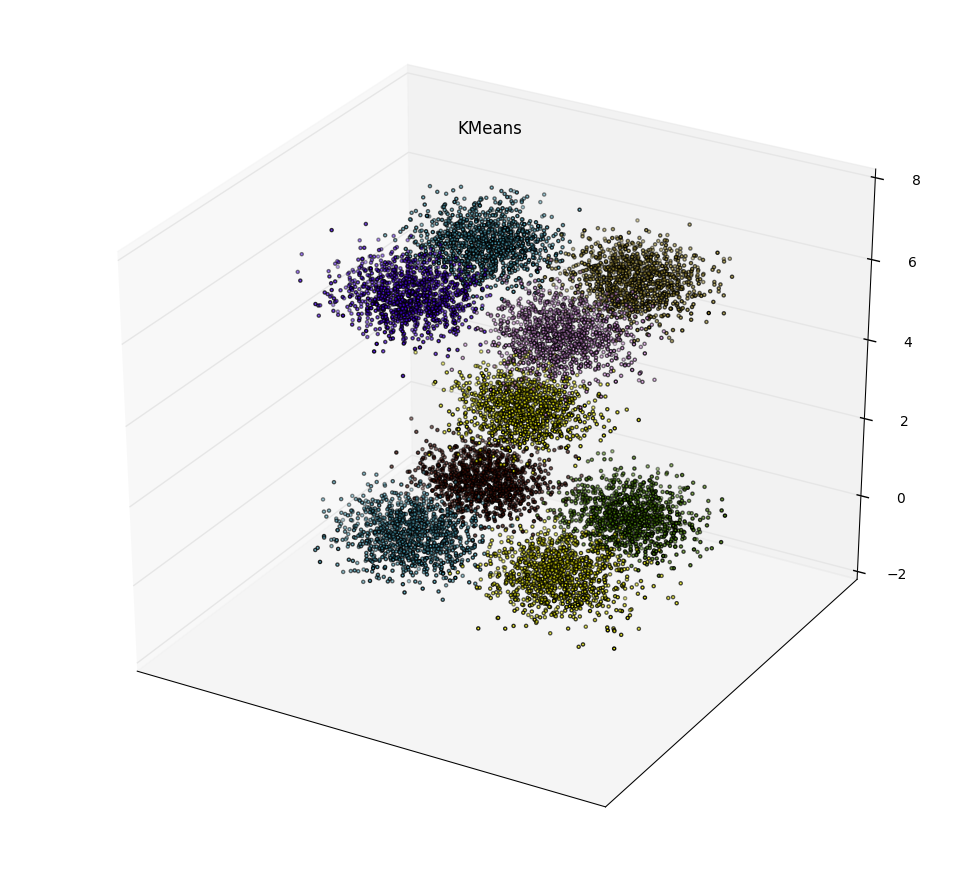

In [79]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#AF9C34', '#4E9006', '#FEFF06','#4E00FF', '#EA9CF4', '#4A0F06', '#FAFC06']*4

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = k_means.cluster_centers_
my_means_cluster_centers = my_means
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
my_means_labels = pairwise_distances_argmin(X, my_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  my_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 1, 1,projection='3d')
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.scatter(X[my_members, 0], X[my_members, 1], X[my_members, 2], 'w',
            facecolors=col, marker='.')
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], 'o', facecolors=col,
            edgecolors='k', s=[6])
ax.set_title('DataSet with 10000 samples 9 clusters')
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plt.text(-3.5, 1.8,1.8,  'train time: %.2fs' % (t_batch))

# # MiniBatchKMeans
# ax = fig.add_subplot(1, 3, 2,projection='3d')
# for k, col in zip(range(n_clusters), colors):
#     my_members = my_means_labels == order[k]
#     cluster_center = my_means_cluster_centers[order[k]]
#     print(k,cluster_center)
#     ax.scatter(X[my_members, 0], X[my_members, 1],X[my_members, 2] ,'w',
#             facecolors=col, marker='.')
#     ax.scatter(cluster_center[0], cluster_center[1],cluster_center[2], 'o', facecolors=col,
#             edgecolors='k', s=[6])
# ax.set_title('myMeans')

# ax.set_xticks(())
# ax.set_yticks(())

plt.show()